# Create presentation figures

**Abstract.** This Jupyter Notebook creates figures for a presentation about Kernel Density Esimation. I've attempted to write reasonably clean so that it can be reproduced later on.

## Setup

Setting up matplotlib, importing packages and setting some plotting globals.

In [1]:
from matplotlib import rcParams

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = [
    "Open Sans",
    "Tahoma",
    "DejaVu Sans",
    "Lucida Grande",
    "Verdana",
]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import functools
import time
import os
import statsmodels.api as sm
from KDEpy import FFTKDE, NaiveKDE
from scipy.stats import norm
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
from KDEpy.utils import cartesian

/home/osboxes/miniconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
FIGSIZE = (8, 4)
LEGEND_SIZE = 13
COLORS = plt.rcParams["axes.prop_cycle"].by_key()["color"]

## What is KDE?

A plot showing what Kernel Density Estimation is graphically.

1 [0] 1
2 [0, 4] 2
3 [0, 4, 7] 3
4 [0, 4, 7, 9] 4
5 [0, 4, 7, 9, 10] 5


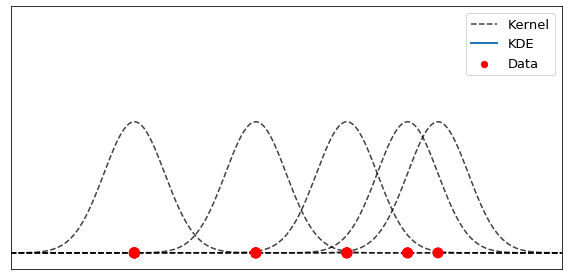

In [4]:
# Number of data points, data and weights
n = 5
data = [0, 4, 7, 9, 10]
weights = np.random.randn(n) ** 0
kernel = "gaussian"

# This is just to get a grid (x)
x, y = NaiveKDE(kernel=kernel).fit(data, weights)()

# Create figure
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(1, 1, 1)

# Scatter the data
lines = ax.scatter(
    data, np.zeros_like(data), s=weights * 20 * 2, color="red", label="Data"
)
plt.yticks([])
plt.xticks([])
plt.xlim([np.min(x), np.max(x)])

# Plot the kernel functions on every data point
plt.legend(loc="best", fontsize=LEGEND_SIZE)
plt.ylim([-0.01, 0.15])
plt.tight_layout()
plt.savefig(f"intro_kde_{kernel}_1.pdf")
for i, (d, w) in enumerate(zip(data, weights), 2):
    y = NaiveKDE(kernel=kernel).fit([d], weights=[w])(x) * w / np.sum(weights)
    if i == 2:
        label = "Kernel"
    else:
        label = None
    lines = ax.plot(x, y, "--k", zorder=-15, alpha=0.75, label=label)
    plt.legend(loc="best", fontsize=LEGEND_SIZE)
    plt.savefig(f"intro_kde_{kernel}_{i}.pdf")

# Color the kernel functions and add to sum
for j in range(1, n + 1):
    print(j, data[:j], j)
    x, y = NaiveKDE(kernel=kernel).fit(data[:j], weights[:j])()
    lines = ax.plot(x, y / n * j, label="KDE", lw=2, color=COLORS[0])
    ax.scatter(data[:j], np.zeros_like(data[:j]), s=weights * 20 * 5, color="red")
    plt.legend(loc="best", fontsize=LEGEND_SIZE)
    plt.savefig(f"intro_kde_{kernel}_{i+j}.pdf")
    l = lines.pop().remove()

## Choice of kernel function

Display some kernel functions.

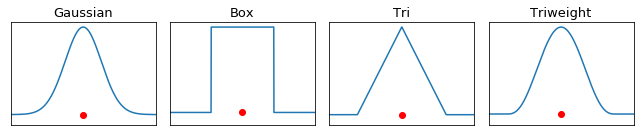

In [5]:
plt.figure(figsize=(9, 2))
plt.tight_layout()
for i, kernel in enumerate(["gaussian", "box", "tri", "triweight"], 1):
    plt.subplot(1, 4, i)
    plt.scatter([0], [0], color="red")
    x = np.linspace(-5, 5, num=2 ** 10)
    y = NaiveKDE(kernel=kernel).fit([0])(x)
    plt.title(kernel.capitalize(), fontsize=LEGEND_SIZE)
    plt.plot(x, y, label=kernel)
    plt.yticks([])
    plt.xticks([])
    plt.xlim([-4, 4])

plt.tight_layout()
plt.savefig("kde_intro_kernels.pdf")

1 [0] 1
2 [0, 4] 2
3 [0, 4, 7] 3
4 [0, 4, 7, 9] 4
5 [0, 4, 7, 9, 10] 5


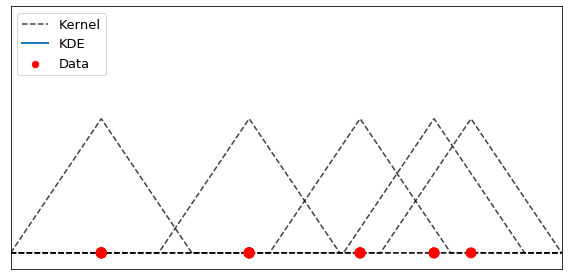

In [6]:
# Number of data points, data and weights
n = 5
data = [0, 4, 7, 9, 10]
weights = np.random.randn(n) ** 0
kernel = "tri"

# To get x
x, y = NaiveKDE(kernel=kernel).fit(data, weights)()

# Create figure
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(1, 1, 1)

# Scatter the data
lines = ax.scatter(
    data, np.zeros_like(data), s=weights * 20 * 2, color="red", label="Data"
)
plt.yticks([])
plt.xticks([])
plt.xlim([np.min(x), np.max(x)])

# Plot the kernel functions on every data point
plt.legend(loc="upper left", fontsize=LEGEND_SIZE)
plt.ylim([-0.01, 0.15])
plt.tight_layout()
plt.savefig(f"intro_kde_{kernel}_1.pdf")
for i, (d, w) in enumerate(zip(data, weights), 2):
    y = NaiveKDE(kernel=kernel).fit([d], weights=[w])(x) * w / np.sum(weights)
    if i == 2:
        label = "Kernel"
    else:
        label = None

    lines = ax.plot(x, y, "--k", zorder=-15, alpha=0.75, label=label)
    plt.legend(loc="upper left", fontsize=LEGEND_SIZE)
    plt.savefig(f"intro_kde_{kernel}_{i}.pdf")

# Color the kernel functions and add to sum
for j in range(1, n + 1):
    print(j, data[:j], j)
    x, y = NaiveKDE(kernel=kernel).fit(data[:j], weights[:j])()
    lines = ax.plot(x, y / n * j, label="KDE", lw=2, color=COLORS[0])
    ax.scatter(data[:j], np.zeros_like(data[:j]), s=weights * 20 * 5, color="red")
    plt.legend(loc="upper left", fontsize=LEGEND_SIZE)
    plt.savefig(f"intro_kde_{kernel}_{i+j}.pdf")
    l = lines.pop().remove()

## Choice of bandwidth

Show how the plot changes as bandwidth changes.

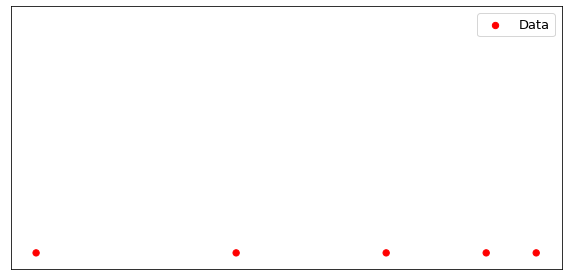

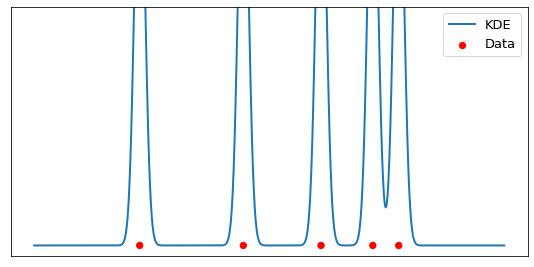

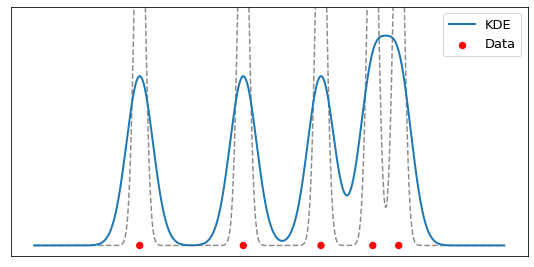

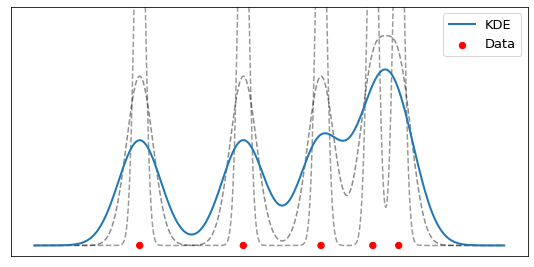

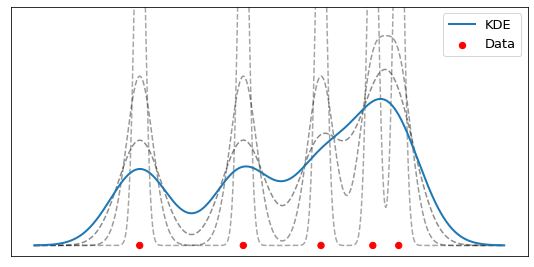

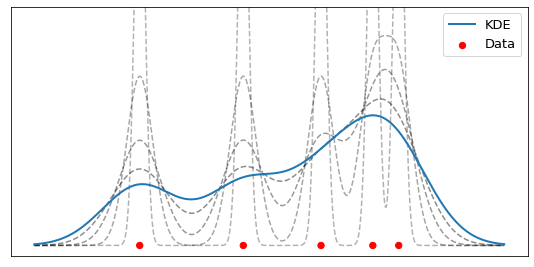

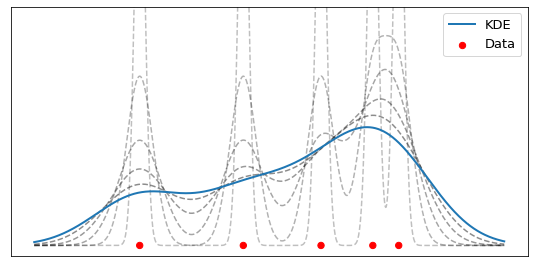

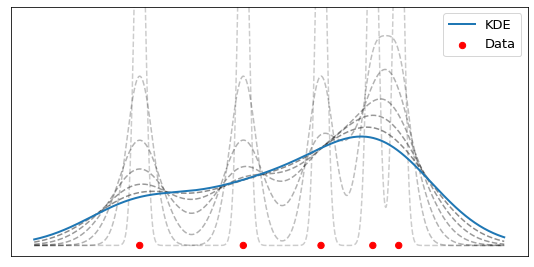

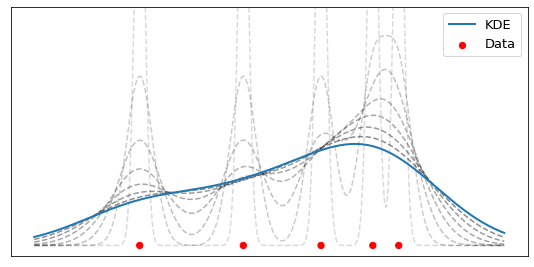

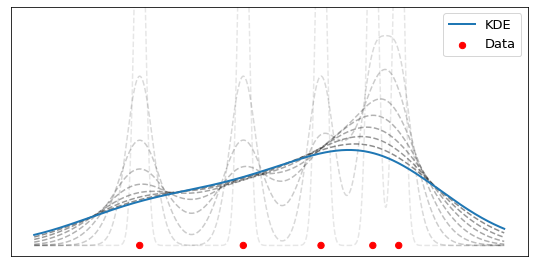

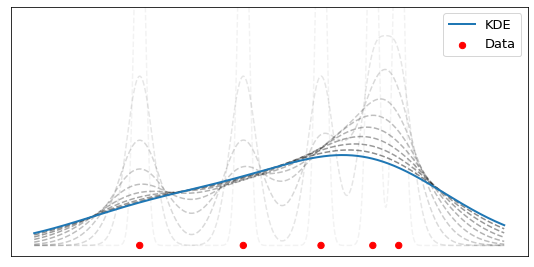

In [7]:
# Number of data points, data and weights
n = 5
data = [0, 4, 7, 9, 10]
weights = np.random.randn(n) ** 0
kernel = "gaussian"
# To get x
x, y = NaiveKDE(kernel=kernel).fit(data, weights)()

# Create figure
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(1, 1, 1)

# Scatter the data
lines = ax.scatter(
    data, np.zeros_like(data), s=weights * 20 * 2, color="red", label="Data"
)
plt.yticks([])
plt.xticks([])

# Plot the kernel functions on every data point
plt.legend(loc="best", fontsize=LEGEND_SIZE)
plt.ylim([-0.01, 0.15])
plt.tight_layout()

for upto in range(1, 10 + 1):

    fig = plt.figure(figsize=FIGSIZE)
    ax = fig.add_subplot(1, 1, 1)

    plt.ylim([-0.01, 0.22])
    plt.tight_layout()
    lines = ax.scatter(
        data, np.zeros_like(data), s=weights * 20 * 2, color="red", label="Data"
    )
    plt.yticks([])
    plt.xticks([])
    bandwidths = np.linspace(0.2, 3, num=10)[:upto]

    for i, bandwidth in enumerate(bandwidths[::-1]):
        # Plot the kernel functions on every data point
        # Create figure
        y = NaiveKDE(kernel=kernel, bw=bandwidth).fit(data, weights)(x)
        if bandwidth == bandwidths[-1]:

            plt.plot(x, y, color=COLORS[0], lw=2, label="KDE")
        else:
            alpha = max(0, (1 - i / 10) / 2)
            # print(bandwidth, alpha)
            plt.plot(x, y, "--k", zorder=-15, alpha=alpha, label=label)

    plt.legend(loc="best", fontsize=LEGEND_SIZE)
    plt.savefig(f"intro_kde_bw_{upto}.pdf")
    plt.show()

## Weighting data

Demonstrate how data points may be weighted.

1 [0] 1
2 [0, 4] 2
3 [0, 4, 7] 3
4 [0, 4, 7, 9] 4
5 [0, 4, 7, 9, 10] 5


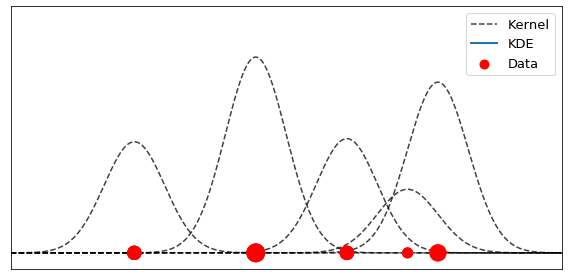

In [8]:
# Number of data points, data and weights
n = 5
data = [0, 4, 7, 9, 10]
np.random.seed(58)
weights = np.abs(np.random.randn(n)) + 1
kernel = "gaussian"
# To get x
x, y = NaiveKDE(kernel=kernel).fit(data, weights)()

# Create figure
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(1, 1, 1)

# Scatter the data
lines = ax.scatter(
    data, np.zeros_like(data), s=weights * 20 * 2, color="red", label="Data"
)
plt.yticks([])
plt.xticks([])
plt.xlim([np.min(x), np.max(x)])

# Plot the kernel functions on every data point
plt.legend(loc="best", fontsize=LEGEND_SIZE)
plt.ylim([-0.01, 0.15])
plt.tight_layout()
plt.savefig(f"intro_kde_w_{kernel}_1.pdf")
for i, (d, w) in enumerate(zip(data, weights), 2):
    y = NaiveKDE(kernel=kernel).fit([d], weights=[w])(x) * w / np.sum(weights)
    if i == 2:
        label = "Kernel"
    else:
        label = None
    lines = ax.plot(x, y, "--k", zorder=-15, alpha=0.75, label=label)
    plt.legend(loc="best", fontsize=LEGEND_SIZE)
    plt.savefig(f"intro_kde_w_{kernel}_{i}.pdf")

# Color the kernel functions and add to sum
for j in range(1, n + 1):
    print(j, data[:j], j)
    x, y = NaiveKDE(kernel=kernel).fit(data[:j], weights[:j])()
    lines = ax.plot(
        x, y * np.sum(weights[:j]) / np.sum(weights), label="KDE", lw=2, color=COLORS[0]
    )
    ax.scatter(data[:j], np.zeros_like(data[:j]), s=weights * 20 * 5, color="red")
    plt.legend(loc="best", fontsize=LEGEND_SIZE)
    plt.savefig(f"intro_kde_w_{kernel}_{i+j}.pdf")
    l = lines.pop().remove()

## Automatic bandwidth selection

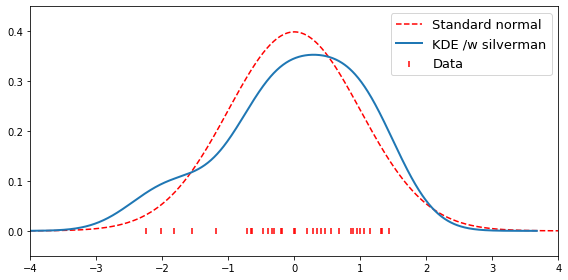

In [9]:
from KDEpy import FFTKDE
from scipy.stats import norm

fig = plt.figure(figsize=FIGSIZE)
# Generate a distribution and some data
np.random.seed(1234)
dist = norm(loc=0, scale=1)
data = dist.rvs(2 ** 5)  # Generate 2**8 points

plt.plot(x, dist.pdf(x), "--", label="Standard normal", color="red")
plt.legend(loc="best", fontsize=LEGEND_SIZE)
plt.ylim([-0.05, 0.45])
plt.xlim([-4, 4])
plt.tight_layout()
plt.savefig("intro_kde_silverman_1.pdf")

plt.scatter(data, np.zeros_like(data), color="red", label="Data", marker="|")
plt.legend(loc="best", fontsize=LEGEND_SIZE)
plt.ylim([-0.05, 0.45])
plt.xlim([-4, 4])
plt.tight_layout()
plt.savefig("intro_kde_silverman_2.pdf")

# Compute density estimates using 'silverman'
x, y = FFTKDE(kernel="gaussian", bw="silverman").fit(data).evaluate()
plt.plot(x, y, label="KDE /w silverman", lw=2)

plt.legend(loc="best", fontsize=LEGEND_SIZE)
plt.ylim([-0.05, 0.45])
plt.xlim([-4, 4])
plt.tight_layout()
plt.savefig("intro_kde_silverman_3.pdf")

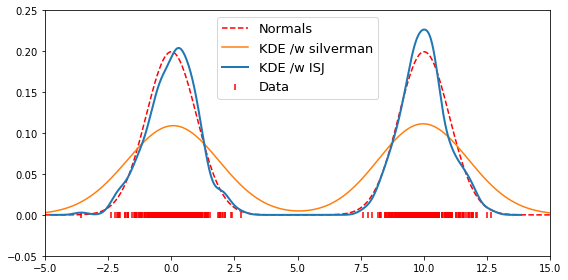

In [10]:
fig = plt.figure(figsize=FIGSIZE)
# Generate a distribution and some data
np.random.seed(1234)
# Generate a distribution and some multimodal data
dist1 = norm(loc=0, scale=1)
dist2 = norm(loc=10, scale=1)
data = np.hstack([dist1.rvs(2 ** 8), dist2.rvs(2 ** 8)])
x, y = FFTKDE(kernel="gaussian", bw="silverman").fit(data).evaluate()

plt.plot(x, (dist1.pdf(x) + dist2.pdf(x)) / 2, "--", label="Normals", color="red")
plt.legend(loc="upper center", fontsize=LEGEND_SIZE)
plt.ylim([-0.05, 0.25])
plt.xlim([-5, 15])
plt.tight_layout()
plt.savefig("intro_kde_ISJ_1.pdf")

plt.scatter(data, np.zeros_like(data), color="red", label="Data", marker="|")
plt.legend(loc="upper center", fontsize=LEGEND_SIZE)
plt.ylim([-0.05, 0.25])
plt.xlim([-5, 15])
plt.tight_layout()
plt.savefig("intro_kde_ISJ_2.pdf")

# Compute density estimates using 'silverman'
x, y = FFTKDE(kernel="gaussian", bw="silverman").fit(data).evaluate()
plt.plot(x, y, label="KDE /w silverman", lw=1.5, color=COLORS[1])

plt.legend(loc="upper center", fontsize=LEGEND_SIZE)
plt.ylim([-0.05, 0.25])
plt.xlim([-5, 15])
plt.tight_layout()
plt.savefig("intro_kde_ISJ_3.pdf")

# Compute density estimates using 'silverman'
x, y = FFTKDE(kernel="gaussian", bw="ISJ").fit(data).evaluate()
plt.plot(x, y, label="KDE /w ISJ", lw=2, color=COLORS[0])

plt.legend(loc="upper center", fontsize=LEGEND_SIZE)
plt.ylim([-0.05, 0.25])
plt.xlim([-5, 15])
plt.tight_layout()
plt.savefig("intro_kde_ISJ_4.pdf")

## Boundary with mirroring

Mirroring data is a simple way to deal with boundary bias when the domain is bounded.

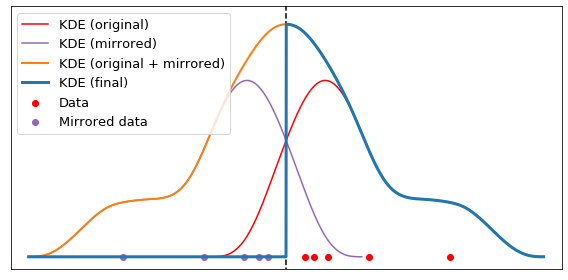

In [11]:
data = np.array([0.1, 0.15, 0.23, 0.45, 0.89])

kde = FFTKDE(bw="silverman", kernel="triweight")
fig = plt.figure(figsize=FIGSIZE)
x, y = kde.fit(data)(2 ** 10)  # Two-step proceudure to get bw

plt.scatter(data, np.zeros_like(data), color="red", label="Data")
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.legend(loc="upper left", fontsize=LEGEND_SIZE)
plt.xlim([-1.5, 1.5])
plt.ylim([-0.1, 2])
plt.plot([0, 0], [-1, 5], "k--")
plt.savefig("intro_kde_mirror_1.pdf")

plt.plot(x, y, color="red", label="KDE (original)")
plt.legend(loc="upper left", fontsize=LEGEND_SIZE)
plt.savefig("intro_kde_mirror_2.pdf")

# Mirror the data about the domain boundary
low_bound = 0
data_mirrored = 2 * low_bound - data
plt.scatter(
    data_mirrored, np.zeros_like(data_mirrored), color=COLORS[4], label="Mirrored data"
)
plt.legend(loc="upper left", fontsize=LEGEND_SIZE)
plt.savefig("intro_kde_mirror_3.pdf")

x, y = FFTKDE(bw=kde.bw, kernel="triweight").fit(data_mirrored)()
plt.plot(x, y, label="KDE (mirrored)", color=COLORS[4])
plt.legend(loc="upper left", fontsize=LEGEND_SIZE)
plt.savefig("intro_kde_mirror_4.pdf")

data = np.concatenate((data, 2 * low_bound - data))
x, y = FFTKDE(bw=kde.bw, kernel="triweight").fit(data)()
plt.plot(x, y * 2, label="KDE (original + mirrored)", color=COLORS[1], lw=2)
plt.legend(loc="upper left", fontsize=LEGEND_SIZE)
plt.savefig("intro_kde_mirror_5.pdf")

# Compute KDE using the bandwidth found, and twice as many grid points
x, y = FFTKDE(bw=kde.bw, kernel="triweight").fit(data)(2 ** 11)
y[x <= low_bound] = 0  # Set the KDE to zero outside of the domain
y = y * 2  # Double the y-values to get integral of ~1

plt.plot(x, y, label="KDE (final)", lw=3)
plt.legend(loc="upper left", fontsize=LEGEND_SIZE)
plt.savefig("intro_kde_mirror_6.pdf")

## Kernel functions in 2D

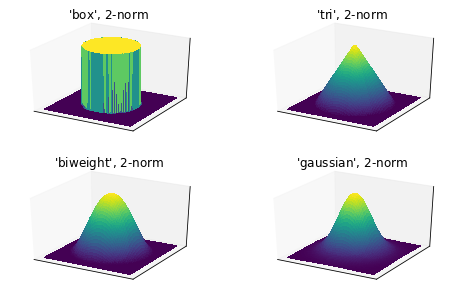

In [12]:
from KDEpy.BaseKDE import BaseKDE
from mpl_toolkits.mplot3d import Axes3D

n = 64
p = np.linspace(-3, 3, num=n)
obs_x_dims = np.array(np.meshgrid(p, p)).T.reshape(-1, 2)

fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(5)

selected_kernels = ["box", "tri", "biweight", "gaussian"]
for i, kernel_name in enumerate(selected_kernels, 1):

    kernel = BaseKDE._available_kernels[kernel_name]
    ax = fig.add_subplot(2, 2, i, projection="3d")
    z = kernel(obs_x_dims, norm=2).reshape((n, n))
    surf = ax.plot_surface(
        *np.meshgrid(p, p),
        z,
        rstride=1,
        cstride=1,
        shade=True,
        antialiased=False,
        cmap="viridis",
    )
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_title(f"'{kernel_name}', $2$-norm")

plt.savefig("2D_intro.pdf")
plt.show()

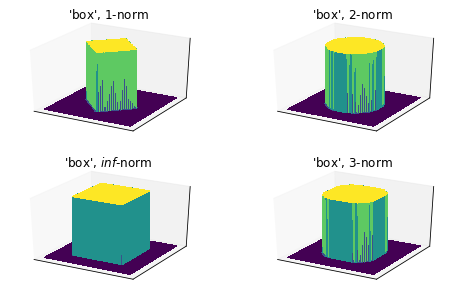

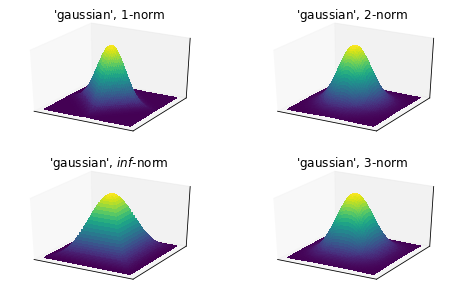

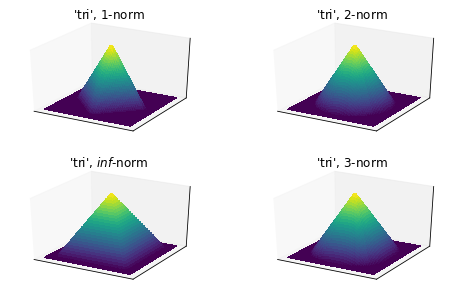

In [13]:
n = 64
p = np.linspace(-3, 3, num=n)
obs_x_dims = np.array(np.meshgrid(p, p)).T.reshape(-1, 2)

for kernel_name in ["box", "gaussian", "tri"]:
    fig = plt.figure()
    fig.set_figwidth(8)
    fig.set_figheight(5)

    ps = [1, 2, np.inf, 3]
    for i, norm in enumerate(ps, 1):

        # kernel_name='box'
        kernel = BaseKDE._available_kernels[kernel_name]
        ax = fig.add_subplot(2, 2, i, projection="3d")
        z = kernel(obs_x_dims, norm=norm).reshape((n, n))
        surf = ax.plot_surface(
            *np.meshgrid(p, p),
            z,
            rstride=1,
            cstride=1,
            shade=True,
            antialiased=False,
            cmap="viridis",
        )
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        ax.set_title(f"'{kernel_name}', ${norm}$-norm")

    plt.savefig(f"2D_intro_norms_{kernel_name}.pdf")
    plt.show()

## The effect of norms

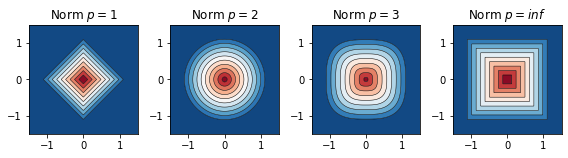

In [14]:
from KDEpy import FFTKDE

# Create 2D data of shape (obs, dims)
data = np.array([[0, 0]])

grid_points = 2 ** 10  # Grid points in each dimension
N = 10  # Number of contours

fig = plt.figure(figsize=(8, 2.2))
norms = [1, 2, 3, np.inf]

for plt_num, norm in enumerate(norms, 1):

    ax = fig.add_subplot(1, len(norms), plt_num, aspect="equal")
    ax.set_title(f"Norm $p={norm}$")

    # Compute the kernel density estimate
    kde = FFTKDE(kernel="tri", norm=norm, bw=1.5)
    grid, points = kde.fit(data).evaluate(grid_points)

    # Compute the kernel density estimate
    kde = FFTKDE(kernel="tri", norm=norm, bw=0.5)
    points = kde.fit(data).evaluate(grid)

    # The grid is of shape (obs, dims), points are of shape (obs, 1)
    x, y = np.unique(grid[:, 0]), np.unique(grid[:, 1])
    z = points.reshape(grid_points, grid_points).T

    # Plot the kernel density estimate
    ax.contour(x, y, z, N, linewidths=0.5, colors="k")
    ax.contourf(x, y, z, N, cmap="RdBu_r", antialiased=True)
    # ax.plot(data[:, 0], data[:, 1], 'xk', ms=3)
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])

plt.tight_layout()
plt.savefig("2D_effect_of_norms_tri.pdf")
plt.show()

## Exampled with data in 2D

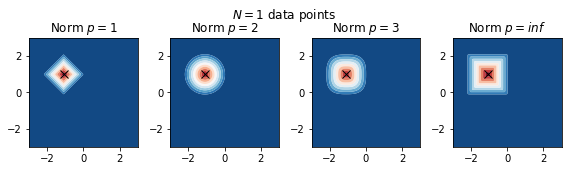

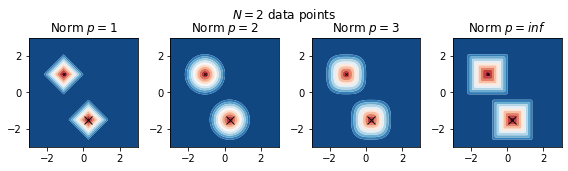

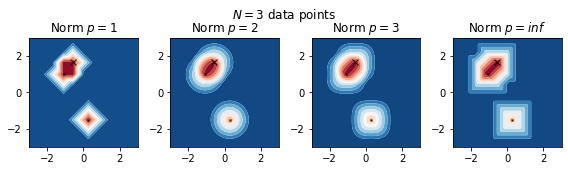

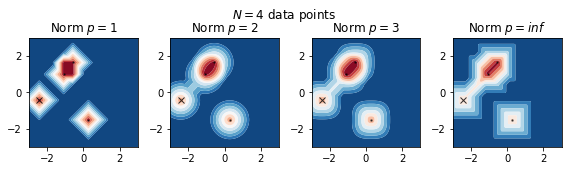

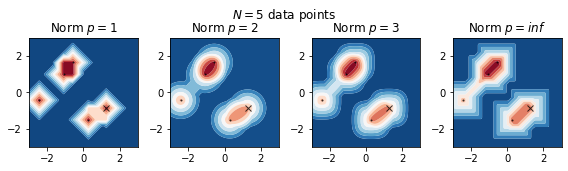

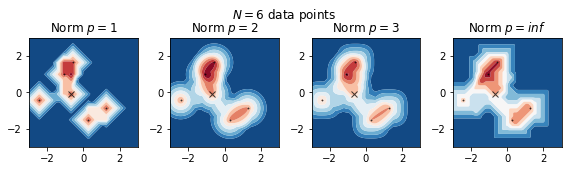

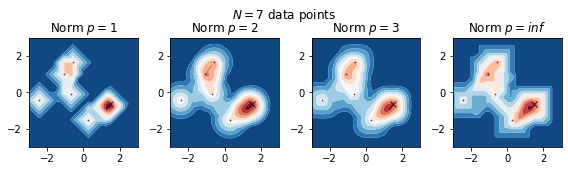

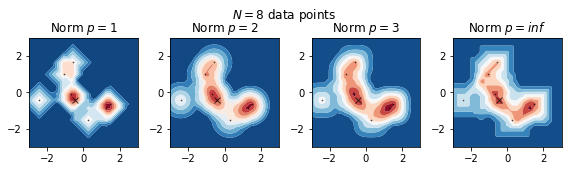

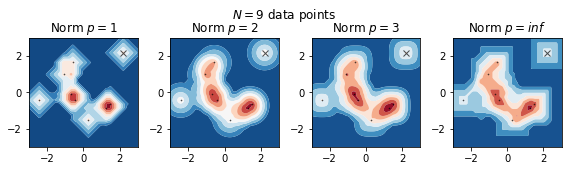

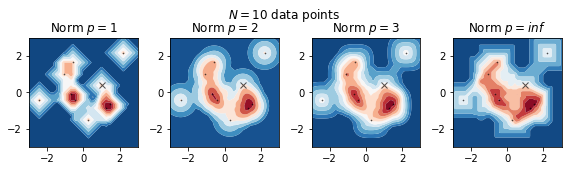

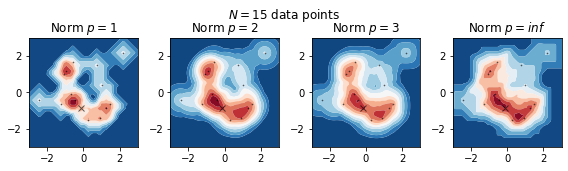

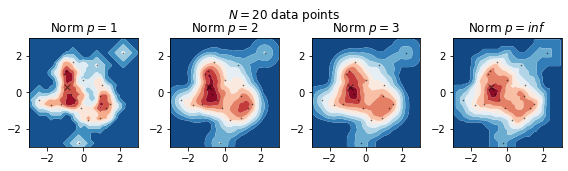

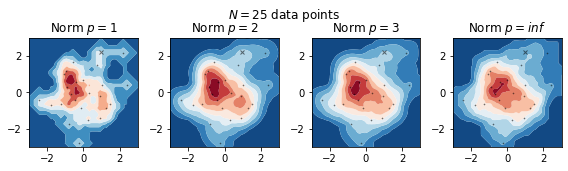

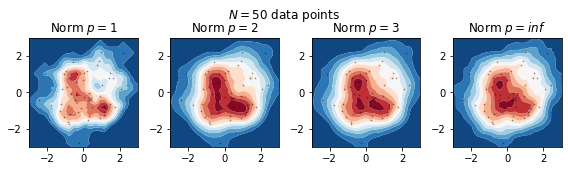

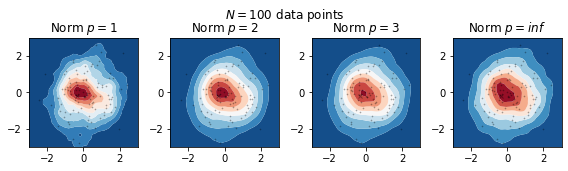

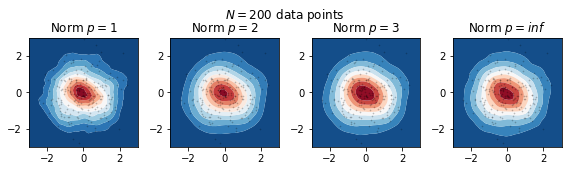

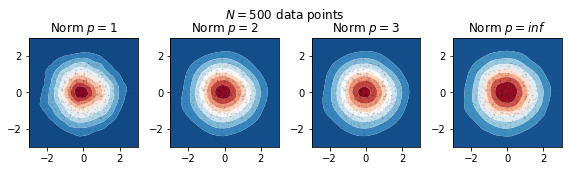

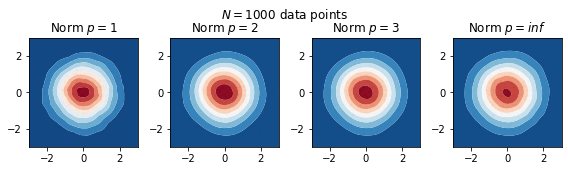

In [15]:
# Create 2D data of shape (obs, dims)
np.random.seed(123)
data_full = np.random.randn(2 ** 10, 2)

grid_points = 2 ** 8  # Grid points in each dimension
N = 10  # Number of contours

# Compute the kernel density estimate
kde = FFTKDE(kernel="tri", norm=2, bw=1.5)
grid, _ = kde.fit(data_full).evaluate(grid_points)


norms = [1, 2, 3, np.inf]

for j, num_inds in enumerate(
    list(np.arange(1, 11)) + [15, 20, 25, 50, 100, 200, 500, 1000], 1
):

    data = data_full[:num_inds, :]
    fig = plt.figure(figsize=(8, 2.5))

    for plt_num, norm in enumerate(norms, 1):

        ax = fig.add_subplot(1, len(norms), plt_num, aspect="equal")
        ax.set_title(f"Norm $p={norm}$")

        # Compute the kernel density estimate
        kde = FFTKDE(kernel="tri", norm=norm, bw=0.5)
        points = kde.fit(data).evaluate(grid)

        # The grid is of shape (obs, dims), points are of shape (obs, 1)
        x, y = np.unique(grid[:, 0]), np.unique(grid[:, 1])
        z = points.reshape(grid_points, grid_points).T

        # Plot the kernel density estimate
        # ax.contour(x, y, z, N, linewidths=0.5, colors='k')
        ax.contourf(x, y, z, N, cmap="RdBu_r", antialiased=True)
        ax.plot(
            data[:-1, 0],
            data[:-1, 1],
            "xk",
            ms=max(1, 3 - np.log(num_inds)),
            alpha=max(0, 1 - np.log(num_inds) / 7),
        )
        ax.plot(
            data[-1:, 0],
            data[-1:, 1],
            "xk",
            ms=max(1, 8 - np.log(num_inds)),
            alpha=max(0, 1 - np.log(num_inds) / 7),
        )
        ax.set_xlim([-3, 3])
        ax.set_ylim([-3, 3])

    plt.tight_layout()
    plt.suptitle(f"$N = {num_inds}$ data points", x=0.5, y=0.975)
    plt.savefig(f"2D_effect_of_norms_tri_data_{j}.pdf")
    plt.show()

## Linear binning

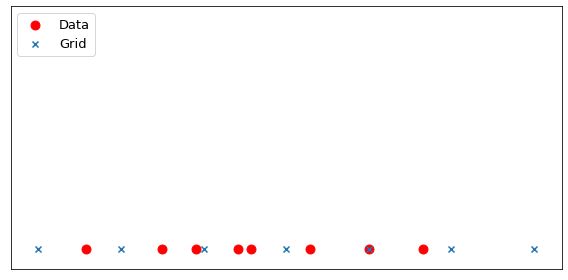

[-2.42667924]


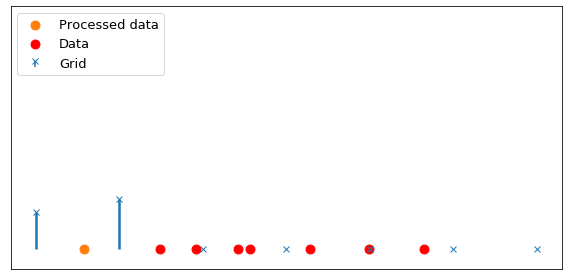

[-2.42667924 -1.50629471]


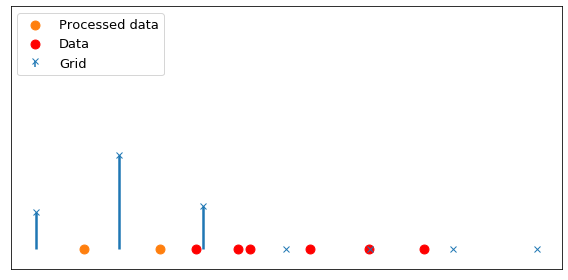

[-2.42667924 -1.50629471 -1.0856306 ]


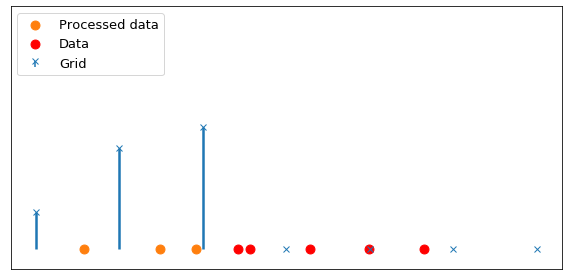

[-2.42667924 -1.50629471 -1.0856306  -0.57860025]


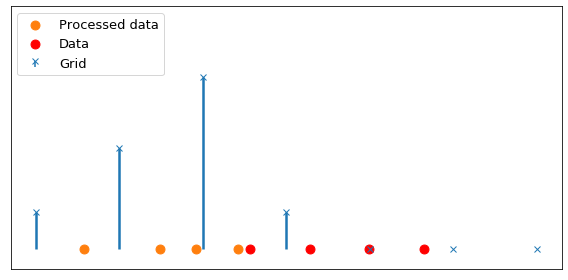

[-2.42667924 -1.50629471 -1.0856306  -0.57860025 -0.42891263]


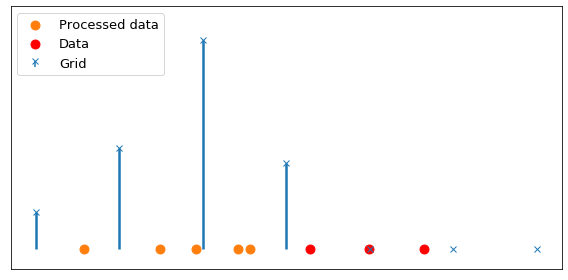

[-2.42667924 -1.50629471 -1.0856306  -0.57860025 -0.42891263  0.2829785 ]


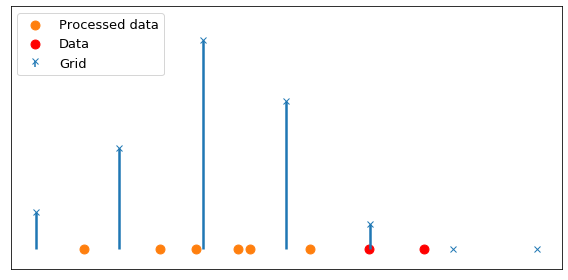

[-2.42667924 -1.50629471 -1.0856306  -0.57860025 -0.42891263  0.2829785
  0.99734545]


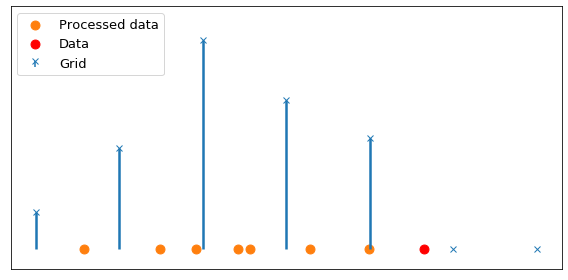

[-2.42667924 -1.50629471 -1.0856306  -0.57860025 -0.42891263  0.2829785
  0.99734545  1.65143654]


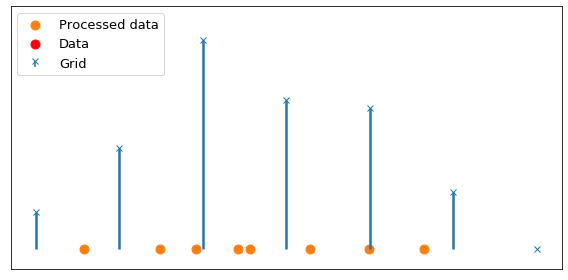

In [19]:
from KDEpy.binning import linear_binning

np.random.seed(123)

data = np.sort(np.random.randn(8) * 1)
grid = np.arange(-3, 4)

plt.figure(figsize=FIGSIZE)
plt.scatter(data, np.zeros_like(data), s=80, color="red", label="Data")
plt.scatter(grid, np.zeros_like(grid), color=COLORS[0], label="Grid", marker="x")
plt.ylim([-0.03, 0.35])
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.legend(loc="upper left", fontsize=LEGEND_SIZE)
plt.savefig(f"linbin_0.pdf")
plt.show()

for upto in range(1, len(data) + 1):
    plt.figure(figsize=FIGSIZE)
    plt.scatter(
        data[:upto],
        np.zeros_like(data)[:upto],
        s=80,
        color=COLORS[1],
        label="Processed data",
    )
    plt.scatter(
        data[upto:], np.zeros_like(data)[upto:], s=80, color="red", label="Data"
    )
    print(data[:upto])
    binned = linear_binning(data[:upto], grid)
    (markerline, stemlines, baseline) = plt.stem(
        grid,
        binned * upto / len(data),
        label="Grid",
        markerfmt="x",
        use_line_collection=True,
    )
    plt.setp(baseline, visible=False)
    plt.setp(stemlines, linewidth=2.5)
    plt.ylim([-0.03, 0.35])
    plt.yticks([])
    plt.xticks([])
    plt.tight_layout()
    plt.legend(loc="upper left", fontsize=LEGEND_SIZE)
    plt.savefig(f"linbin_{upto}.pdf")
    plt.show()

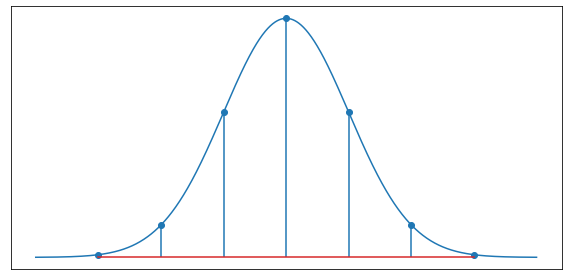

In [20]:
from KDEpy.kernel_funcs import _kernel_functions

gaussian = _kernel_functions["gaussian"]

plt.figure(figsize=FIGSIZE)
x = np.linspace(-4, 4, 2 ** 10)
y = gaussian(x, bw=1)
plt.yticks([])
plt.xticks([])

plt.plot(x, y)
plt.tight_layout()

plt.savefig(f"linbin_sample_1.pdf")

x = np.arange(-3, 4)
plt.stem(x, gaussian(x, bw=1), use_line_collection=True)

plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.savefig(f"linbin_sample_2.pdf")

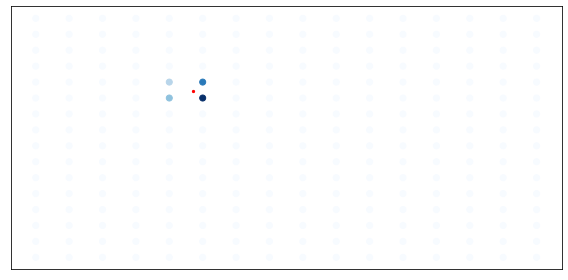

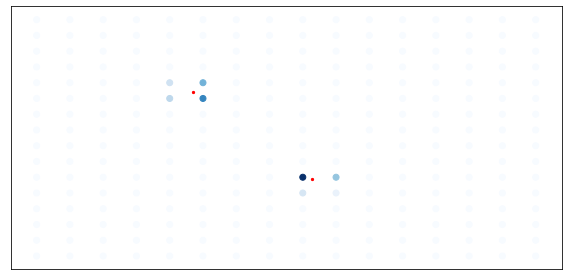

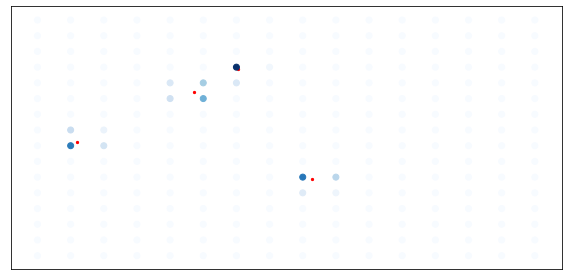

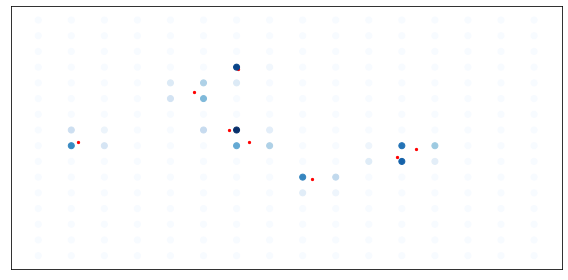

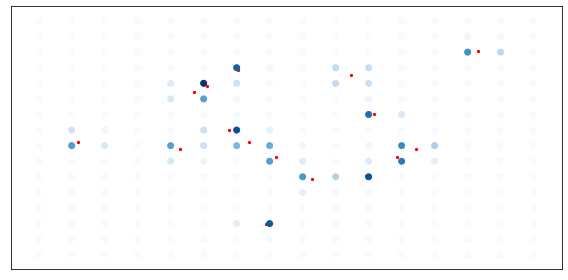

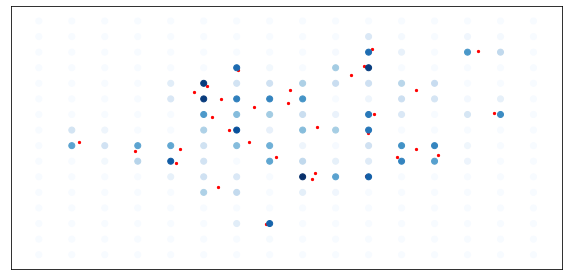

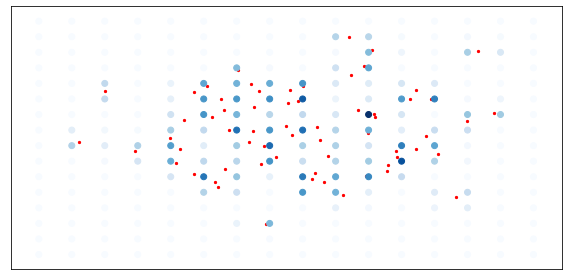

In [18]:
np.random.seed(123)

k = 16
data_full = np.random.randn(100, 2)
grid, vals = FFTKDE(bw=0.1).fit(data_full)((k, k))

# Add more and more data and compute binning
for j, upto in enumerate([1, 2, 4, 8, 16, 32, 64], 1):
    data = data_full[:upto, :]
    
    plt.figure(figsize=FIGSIZE)
    plt.scatter(data[:, 0], data[:, 1], color='red', s=5)

    binned = linear_binning(data, grid)

    plt.scatter(grid[:, 0], grid[:, 1], c=binned, cmap='Blues')
    plt.yticks([]); plt.xticks([]);
    plt.tight_layout()
    plt.savefig(f'linbin_2D_{j}.pdf')
    plt.show()